In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
csv_path = "Features/color_features.csv"  # Make sure this matches your actual path
df = pd.read_csv(csv_path)
df.head()

,mean_red,mean_green,mean_blue,std_red,std_green,std_blue,mean_hue,mean_saturation,mean_value,class_label
0,92.364929,114.298828,92.009094,32.339661,48.030082,36.514170,29.746460,62.737671,117.986816,Castor
1,94.860291,111.429688,92.730042,31.661225,53.657084,38.576700,27.903992,58.489746,115.851746,Castor
2,84.896423,97.462830,84.200806,30.846518,53.781409,39.602381,24.970764,53.890808,101.892212,Castor
3,105.072632,106.761902,77.725525,58.609950,52.922770,39.989274,53.293579,98.761597,124.034973,Castor
4,93.501404,103.268738,87.172119,28.691597,41.841382,30.839832,49.358154,47.089233,107.040344,Castor


In [6]:
X = df.drop("class_label", axis=1)  # Features
y = df["class_label"]               # Target

# Optional: View the distribution of classes
print("Class distribution:\n", y.value_counts())

Class distribution:
 class_label
Tulsi             177
Tamarind          176
Curry             168
Palak(Spinach)    149
Doddpathre        142
Mint              135
Papaya            135
Catharanthus      134
Neem              132
Castor            129
Name: count, dtype: int64


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# RandomForest

In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = model.predict(X_test)

Accuracy Score: 0.6554054054054054

Classification Report:
                 precision    recall  f1-score   support

        Castor       0.38      0.31      0.34        26
  Catharanthus       0.95      0.70      0.81        27
         Curry       0.62      0.47      0.53        34
    Doddpathre       0.56      0.71      0.62        28
          Mint       0.56      0.67      0.61        27
          Neem       0.72      0.81      0.76        26
Palak(Spinach)       0.70      0.63      0.67        30
        Papaya       0.66      0.70      0.68        27
      Tamarind       0.87      0.94      0.90        35
         Tulsi       0.55      0.58      0.57        36

      accuracy                           0.66       296
     macro avg       0.66      0.65      0.65       296
  weighted avg       0.66      0.66      0.65       296



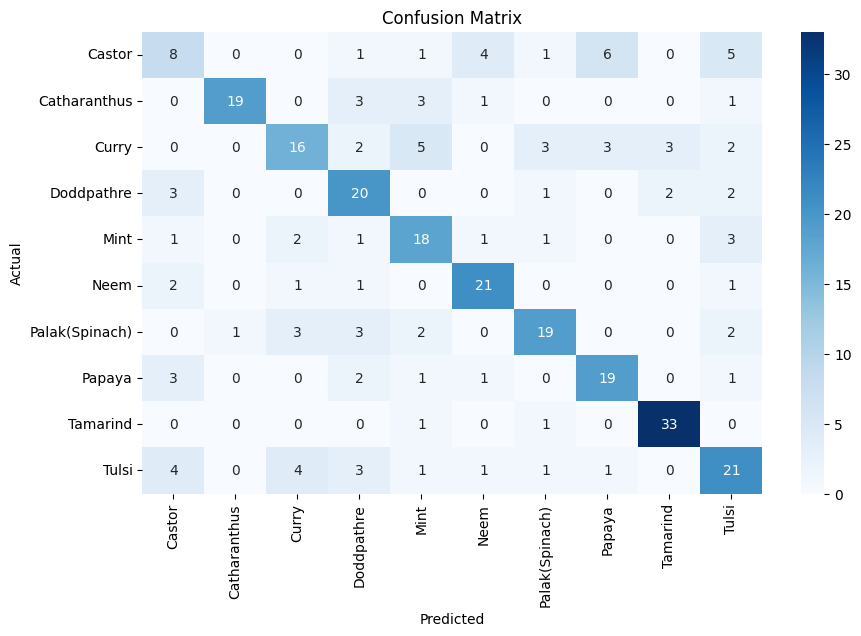

In [14]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# SVM

In [18]:
from sklearn.svm import SVC

In [20]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [22]:
y_pred_svm = svm_model.predict(X_test)

SVM Accuracy Score: 0.4189189189189189

SVM Classification Report:
                 precision    recall  f1-score   support

        Castor       0.22      0.54      0.31        26
  Catharanthus       0.93      0.52      0.67        27
         Curry       0.31      0.35      0.33        34
    Doddpathre       0.58      0.25      0.35        28
          Mint       0.18      0.07      0.11        27
          Neem       0.51      0.69      0.59        26
Palak(Spinach)       0.38      0.27      0.31        30
        Papaya       0.38      0.48      0.43        27
      Tamarind       0.56      0.77      0.65        35
         Tulsi       0.50      0.25      0.33        36

      accuracy                           0.42       296
     macro avg       0.46      0.42      0.41       296
  weighted avg       0.46      0.42      0.41       296



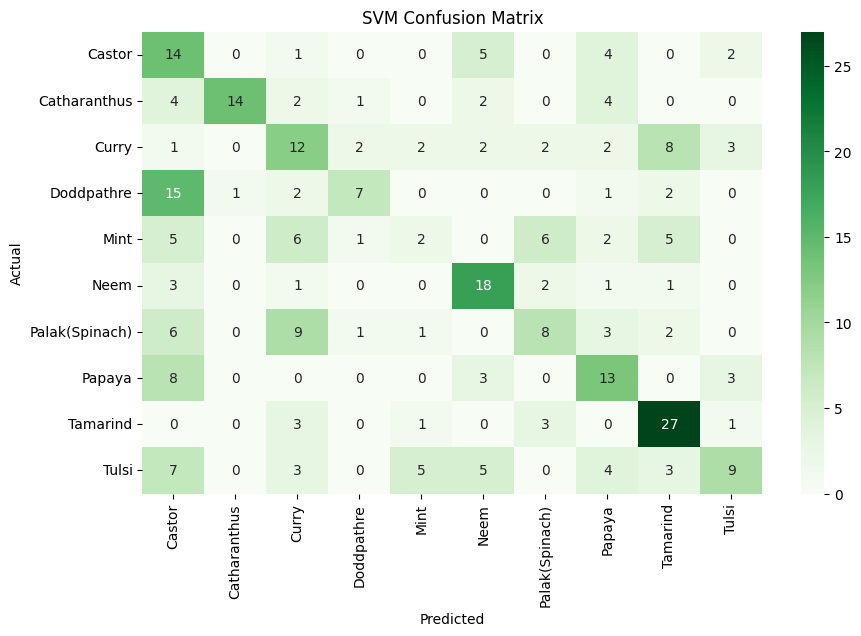

In [24]:
print("SVM Accuracy Score:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix for SVM
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_mat_svm, annot=True, fmt='d', cmap='Greens',
            xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# KNN 

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune 'n_neighbors' value
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred_knn = knn_model.predict(X_test)

KNN Accuracy Score: 0.581081081081081

KNN Classification Report:
                 precision    recall  f1-score   support

        Castor       0.35      0.46      0.40        26
  Catharanthus       0.67      0.74      0.70        27
         Curry       0.43      0.35      0.39        34
    Doddpathre       0.52      0.61      0.56        28
          Mint       0.58      0.52      0.55        27
          Neem       0.71      0.77      0.74        26
Palak(Spinach)       0.61      0.57      0.59        30
        Papaya       0.56      0.56      0.56        27
      Tamarind       0.78      0.89      0.83        35
         Tulsi       0.58      0.39      0.47        36

      accuracy                           0.58       296
     macro avg       0.58      0.58      0.58       296
  weighted avg       0.58      0.58      0.58       296



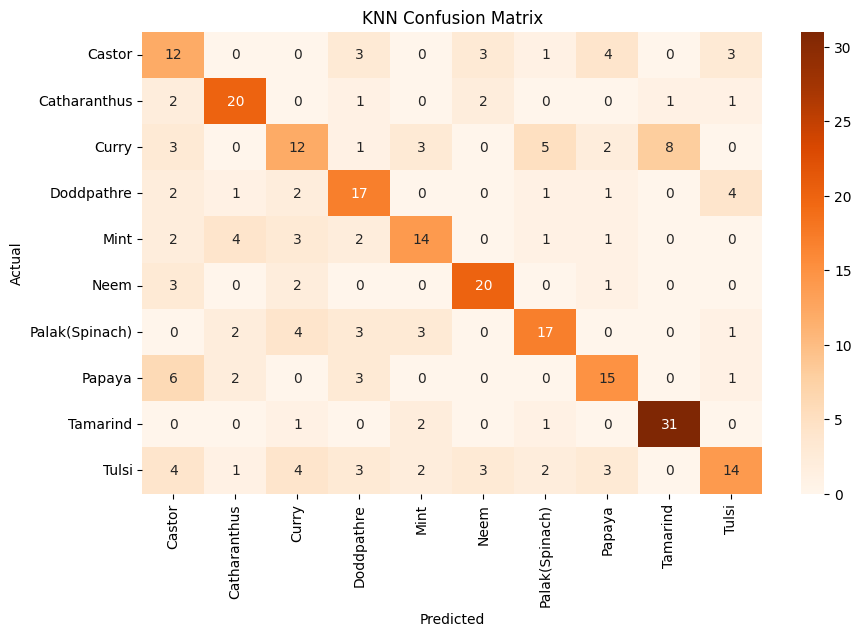

In [34]:
print("KNN Accuracy Score:", accuracy_score(y_test, y_pred_knn))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix for KNN
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_mat_knn, annot=True, fmt='d', cmap='Oranges',
            xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
y_pred_dt = dt_model.predict(X_test)

Decision Tree Accuracy Score: 0.46959459459459457

Decision Tree Classification Report:
                 precision    recall  f1-score   support

        Castor       0.30      0.31      0.30        26
  Catharanthus       0.50      0.44      0.47        27
         Curry       0.38      0.26      0.31        34
    Doddpathre       0.48      0.57      0.52        28
          Mint       0.48      0.44      0.46        27
          Neem       0.68      0.65      0.67        26
Palak(Spinach)       0.39      0.40      0.39        30
        Papaya       0.43      0.44      0.44        27
      Tamarind       0.87      0.77      0.82        35
         Tulsi       0.29      0.39      0.33        36

      accuracy                           0.47       296
     macro avg       0.48      0.47      0.47       296
  weighted avg       0.48      0.47      0.47       296



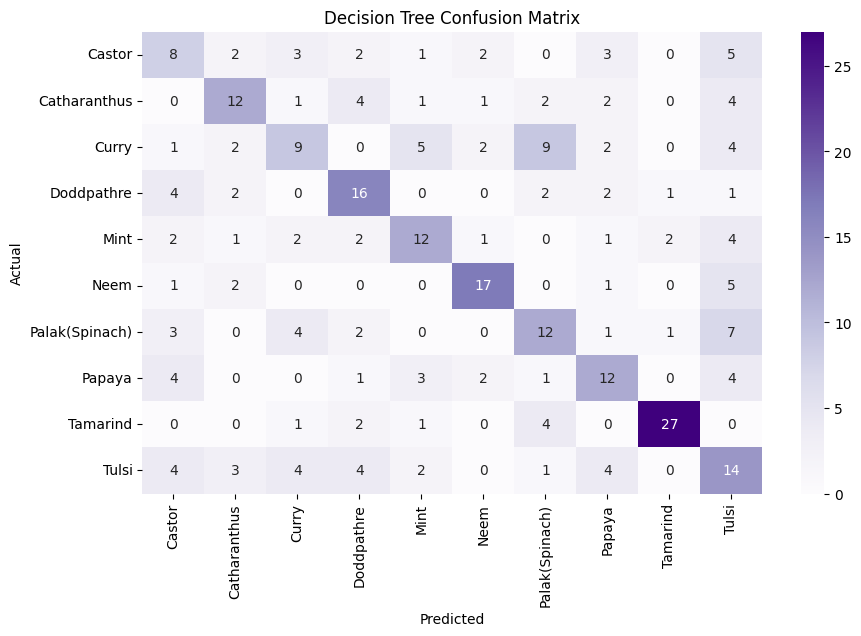

In [56]:
print("Decision Tree Accuracy Score:", accuracy_score(y_test, y_pred_dt))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix for Decision Tree
conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_mat_dt, annot=True, fmt='d', cmap='Purples',
            xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB

In [61]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [63]:
y_pred_nb = nb_model.predict(X_test)

Naive Bayes Accuracy Score: 0.31756756756756754

Naive Bayes Classification Report:
                 precision    recall  f1-score   support

        Castor       0.19      0.50      0.28        26
  Catharanthus       0.73      0.30      0.42        27
         Curry       0.25      0.12      0.16        34
    Doddpathre       0.40      0.14      0.21        28
          Mint       0.04      0.04      0.04        27
          Neem       0.29      0.65      0.40        26
Palak(Spinach)       0.15      0.07      0.09        30
        Papaya       0.36      0.44      0.40        27
      Tamarind       0.71      0.77      0.74        35
         Tulsi       0.26      0.17      0.20        36

      accuracy                           0.32       296
     macro avg       0.34      0.32      0.29       296
  weighted avg       0.34      0.32      0.30       296



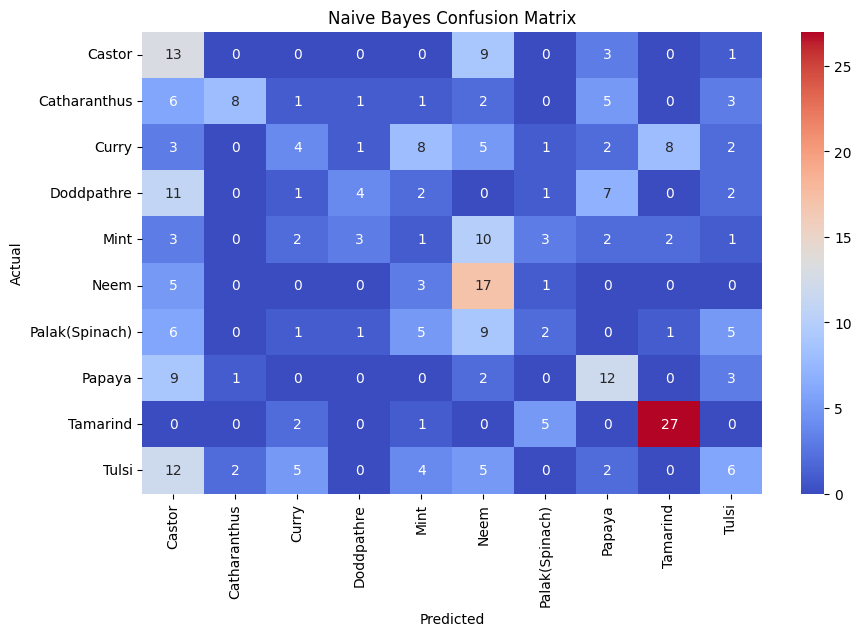

In [65]:
print("Naive Bayes Accuracy Score:", accuracy_score(y_test, y_pred_nb))
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix for Naive Bayes
conf_mat_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_mat_nb, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

In [71]:
# Initialize a dictionary to store model names and their accuracy scores
model_accuracies = {
    'Random Forest': accuracy_score(y_test, y_pred)*100,
    'SVM': accuracy_score(y_test, y_pred_svm),
    'KNN': accuracy_score(y_test, y_pred_knn),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Naive Bayes': accuracy_score(y_test, y_pred_nb)
}

# Convert dictionary to DataFrame for easy visualization
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

# Display the accuracy table
# Apply styling to the accuracy DataFrame
styled_accuracy_df = accuracy_df.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', 'lightblue'), ('color', 'black'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('background-color', 'lightgray'), ('color', 'black')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', 'whitesmoke')]},  # Alternate row colors
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', 'white')]},  # Alternate row colors
    {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%')]},  # Table properties
])

# Display the styled table
styled_accuracy_df


,Model,Accuracy
0,Random Forest,0.655405
1,SVM,0.418919
2,KNN,0.581081
3,Decision Tree,0.469595
4,Naive Bayes,0.317568


C:\Users\anant\AppData\Local\Temp\ipykernel_11144\4162679661.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')


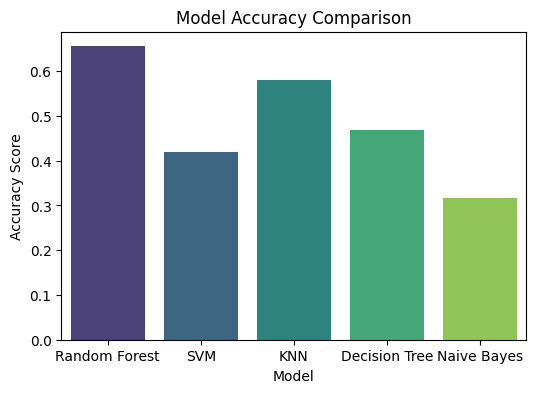

In [81]:
# Plotting the accuracy of all models
plt.figure(figsize=(6, 4))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.xlabel('Model')
plt.show()